#실습6_**이미지 필터1**

##01 이미지 필터

**이미지 필터**란 이미지에서 원하는 정보만 통과시키고 원치 않는 정보는 걸러 내거나 변경하는 작업

-  **주파수 영역 필터 (Frequency Domain Filtering)**: 이미지의 픽셀 값의 차이를 주파수로 변환해서 활용

-  **공간 영역 필터 (Spatial Domain Filtering)**: **커널**이라고 불리는 **마스크**를 사용해 이미지의 특정구간을 차례대로 **컨볼루션 연산**하여 활용 







**01.1 커널(kernel)과 필터(Filter)** 
  - 커널(kernel) 혹은 윈도우(window)라고 불리는 마스크를 사용해 이미지 필터링을 수행

  - 주변 픽셀을 어디까지 활용할 것인지 혹은어떻게 결과 값을 산출할 것인지를 정한 행렬

<br>
$$
\mathbf{Kernel}
=
\frac{1}{9}
\times
\begin{bmatrix} 
    1   &1   &1 \\
    1   &1   &1 \\
    1   &1   &1 \\
\end{bmatrix}
$$
<br>

  - 커널의 가로x세로 크기는 3x3, 7x7, 5x7... 등 다양하지만 꼭 **홀수**로 사용해야 가운데 픽셀을 중심으로 주변 픽셀 연산이 가능함  

      <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_kernel_sizes.jpg" alt="img" height="150"/>

<br>

  - 보통 **커널(kernel)**과 **필터(filter)**를 혼용해 사용하지만 보통 딥러닝에서 **필터**는 커널보다 한 단계 높은 **여러 개의 커널**을 지칭

  ![img](https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)


**01.2 컨볼루션(Convolution, 합성곱) 연산**

커널이 이미지의 모든 픽셀을 하나하나 옮겨서 타겟 픽셀과 그 주변 픽셀 값을 연산하고 새로운 값을 도출하는 연산

<br> 
 <img src="https://www.slipp.net/wiki/download/attachments/26641520/image2017-5-10%2017%3A10%3A29.png?version=1&modificationDate=1494406656000&api=v2" alt="img" height="350"/>



<br>


- 이때 움직이는 커널을 **슬라이딩 윈도우(Sliding Window)**라고도 부름
-  **첫 (0,0)픽셀부터 시작**해서 **오른쪽**으로 한 픽셀씩 옮겨 컨볼루션 연산을 한 뒤 끝에 도달하면 <br> **아래쪽**으로 한 픽셀 내려가 다시 한 픽셀 씩 오른쪽으로 옮겨서 연산 

  ![img](https://miro.medium.com/max/780/1*Eai425FYQQSNOaahTXqtgg.gif)

<br>




- 보통 컨볼루션 연산을 적용하면 커널의 크기에 따라 결과 이미지의 사이즈가 달라짐
- 이를 보완하기 위해 테두리 밖의 이미지에 가상의 픽셀을 추가하는 처리를 **패딩(padding)**이라고 함  

 <img src="https://theano-pymc.readthedocs.io/en/latest/_images/no_padding_no_strides.gif" alt="img" height="250"/>

 <img src="https://theano-pymc.readthedocs.io/en/latest/_images/same_padding_no_strides.gif" alt="img" height="350"/>

  <img src="https://theano-pymc.readthedocs.io/en/latest/_images/full_padding_no_strides.gif" alt="img" height="350"/>

<br>







- 다양한 크기와 값을 가진 마스크/커널을 적용하면 연산하면 결과가 달라짐
    
  - **블러링 필터(Blurring Filter)**: 결과 픽셀에 주변 요소 값들의 평균값을 반영해 흐릿해짐
    
  - **샤프닝 필터(Sharpening Filter)**: 결과 픽셀에 주변 요소 값들의 차이를 반영해 선명해짐 

<br>





```
cv2.filter2D(image, dtype, kernel)
```
Parameters:
- image: 입력 이미지
- 결과이미지의 dtype
  - -1: 입력 이미지와 동일
  - CV_8U, CV_32F, CV_64F 등등
- kernel: 컨볼루션 커널, float32의 N x M 크기의 배열  



<br><br>

참고링크: 
1. [Types of Convolution Kernels : Simplified](https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37)
2. [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
3. [Convolutions with OpenCV and Python](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)
4. [5% salt-and-pepper noise 사진](http://www.fit.vutbr.cz/~vasicek/imagedb/)



##02 블러링 필터(Blurring Filter)

<br>

**02.1 평균 블러링 필터**
- 필터링 대상 위치에서 가까이 있는 픽셀과 멀리 있는 픽셀이 모두 같은 가중치를 사용하여 평균을 계산
- 멀리 있는 픽셀의 영향을 많이 받을 수 있음
```
	cv2.blur(image, (M, N))
```
  Parameters:
  - image: 입력 이미지
  - (M,N): 컨볼루션 커널float32의 배열 크기 N x M  
  - $\frac{1}{1+1+1+1+1+1+1+1+1}$= $\frac{1}{9}$

    ![](https://wjrmffldrhrl.github.io/assets/images/digital_9/avg_filter.png)



In [ ]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


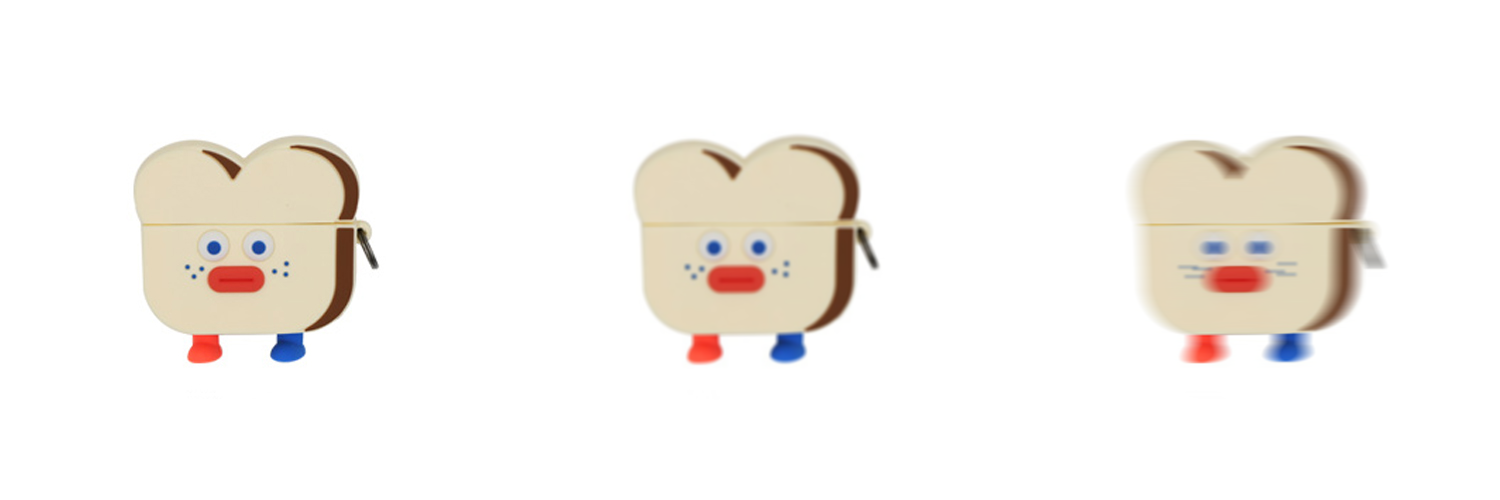

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

#커널 직접 구현
# kernel = np.array([[0.04,0.04,0.04,0.04,0.04],
#                    [0.04,0.04,0.04,0.04,0.04],
#                    [0.04,0.04,0.04,0.04,0.04],
#                    [0.04,0.04,0.04,0.04,0.04],
#                    [0.04,0.04,0.04,0.04,0.04]])
#커널 간편 구현
kernel = np.ones((5,5))/25

#openCV 필터2D 함수를 사용
blurred1 = cv2.filter2D(image, -1, kernel)

#openCV 블러링 함수를 사용
#가로 블러링
#blurred2 = cv2.blur(image,(20,1))
#세로 블러링
#blurred2 = cv2.blur(image,(1,20))
blurred2 = cv2.blur(image,(20,1))


blurred_images = np.hstack([image,blurred1,blurred2])
cv2_imshow(blurred_images)

**02.2 가우시안 블러링 필터**
- 가운데 값일 수록 가우시안 가중치를 더한 필터
- 대상 픽셀에 가까울수록 영향을 많이 주고, 멀어질수록 영향을 적게 줌
- 원래의 영상과 비슷하면서도 노이즈를 제거하는 효과


```
	cv2.GaussianBlur(image, (M, N), σ)
```
  Parameters:
  - image: 입력 이미지
  - (M,N): 컨볼루션 커널float32의 배열 크기 N x M  
  - $\frac{1}{1+2+1+2+4+2+1+2+1}$= $\frac{1}{16}$
      <img src="https://wjrmffldrhrl.github.io/assets/images/digital_9/gaussian_filter.png" alt="img" height="150"/>

  - σ:  x방향 표준편차, 블러링을 어느정도 할지 결정 
    - 0: 시그마 값 자동 설정
    - y방향 시그마 값을 설정하지 않으면 x와 y시그마 값을 동일 설정
    
    <br>
    <img src="http://media5.datahacker.rs/2020/05/image5.png" alt="img" height="250"/>
    <img src="https://miro.medium.com/max/1400/1*UNia4_xaMhui465JKKHGVg.png" alt="img" height="250"/>




원본, 가우시안필터 직접생성, getGaussianKernel(), cv2.GaussianBlur()


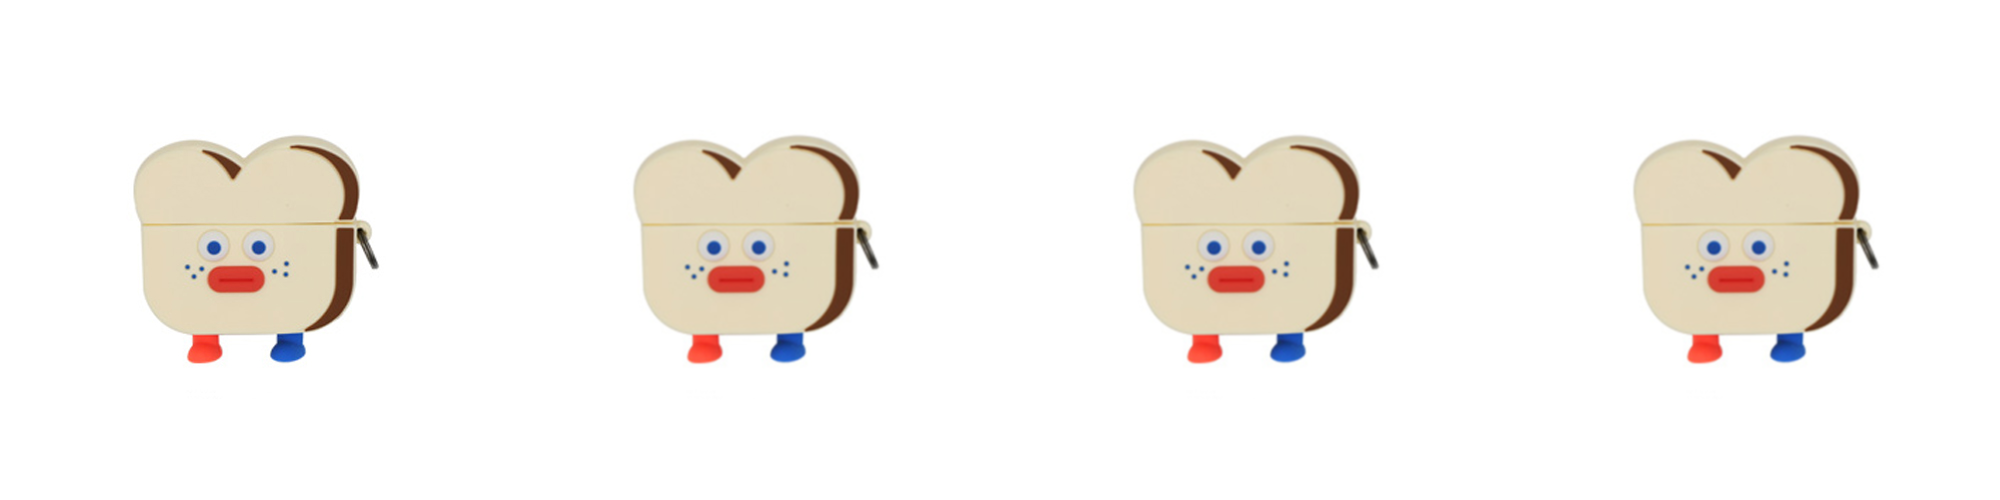

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')


#가우시안 커널을 직접 만들기 
kernel1 = np.array([[1,2,1],
                    [2,4,2],
                    [1,2,1]])*(1/16)
blurred1 = cv2.filter2D(image, -1, kernel1)

#OpenCV에서 제공하는 가우시안 함수를 사용해 필터에 적용
#cv2.getGaussianKernel()함수는 1차원 배열이기 때문에 K*K.T 형식으로 사용
kernel2 = cv2.getGaussianKernel(3,0)
blurred2 = cv2.filter2D(image, -1, kernel2*kernel2.T)

#OpenCV에서 제공하는 가우시안 필터 함수 사용
blurred3 = cv2.GaussianBlur(image,(3,3),0)

print("원본, 가우시안필터 직접생성, getGaussianKernel(), cv2.GaussianBlur()")
blurred_images = np.hstack([image,blurred1,blurred2,blurred3])
cv2_imshow(blurred_images)



**02.3 미디언 블러링 필터**
- 커널 영역의 픽셀 값 중 중간 값을 선택
- salt & pepper 노이즈를 해결하는데 좋은 성능을 보임(※salt & pepper: 점잡음 (점잡음을 없애기 위해 중간값필터가 필요하다.))
```
	cv2.medianBlur(image, dimension),
```
  Parameters:
  - image: 입력 이미지
  - (M,N): 컨볼루션 커널float32의 배열 크기 N x M  
  - dimension: 커널크기



original, 3, 5, 7


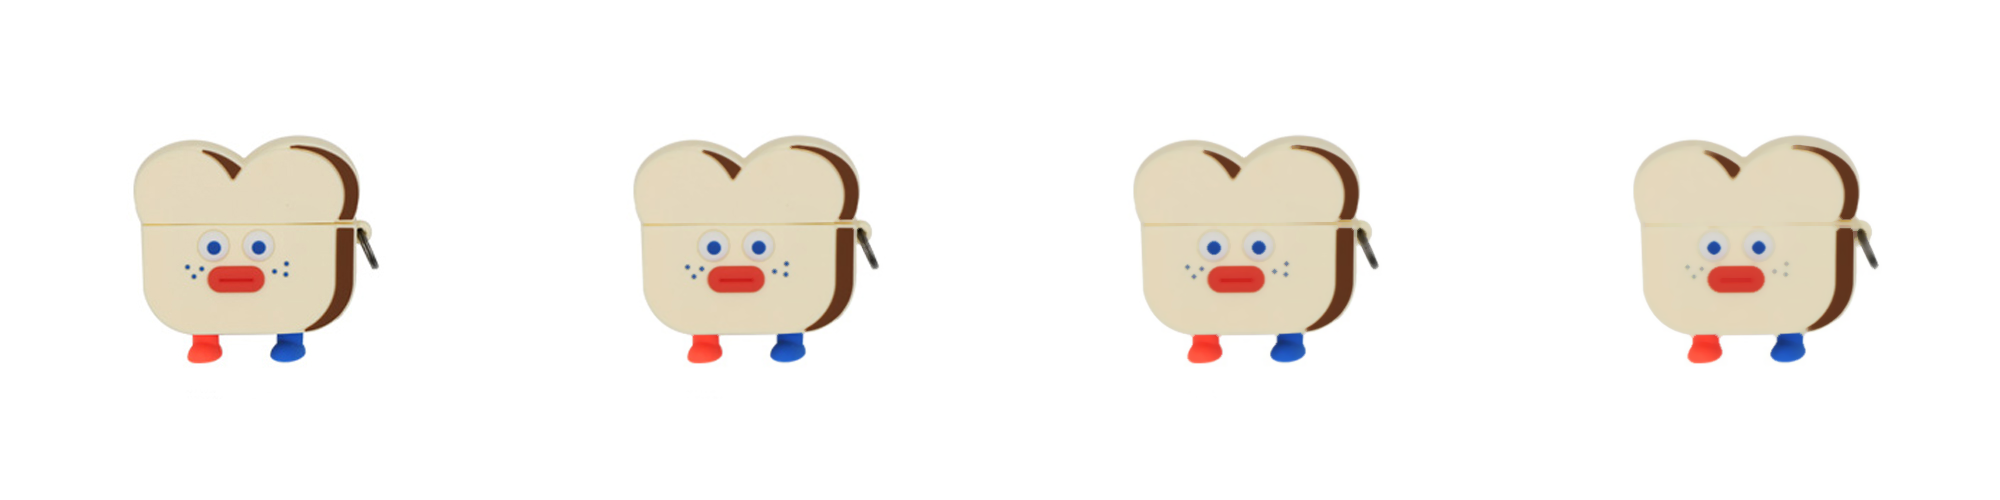

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

medianBlurred = np.hstack([
  image,
	cv2.medianBlur(image, 3),
	cv2.medianBlur(image, 5),
	cv2.medianBlur(image, 7)])

print("original, 3, 5, 7")
cv2_imshow(medianBlurred)

**02.4 바이레터럴 필터**
- 가우시안 필터와 경계 필터 2개를 사용하여 노이즈를 없애면서 선명도를 높여주는 필터
- 연산 속도가 느리다는 단점이 있음
```
	cv2.bilateralFilter(image, dimension, sigmaColor, sigmaSpace)
```
  Parameters:
  - image: 입력 이미지
  - dimension: 커널크기 (5보다 크면 많이 느려짐)
  - sigmaColor: 색공간 필터의 시그마 값
  - sigmaSpace: 좌표공간의 시그마 값 (10-150부터 sigmaColor과 같은 값으로 권장)
  <br><br>
  <img src="https://media.geeksforgeeks.org/wp-content/uploads/20190825010814/Untitled-Diagram-138.png" alt="img" height="250"/>


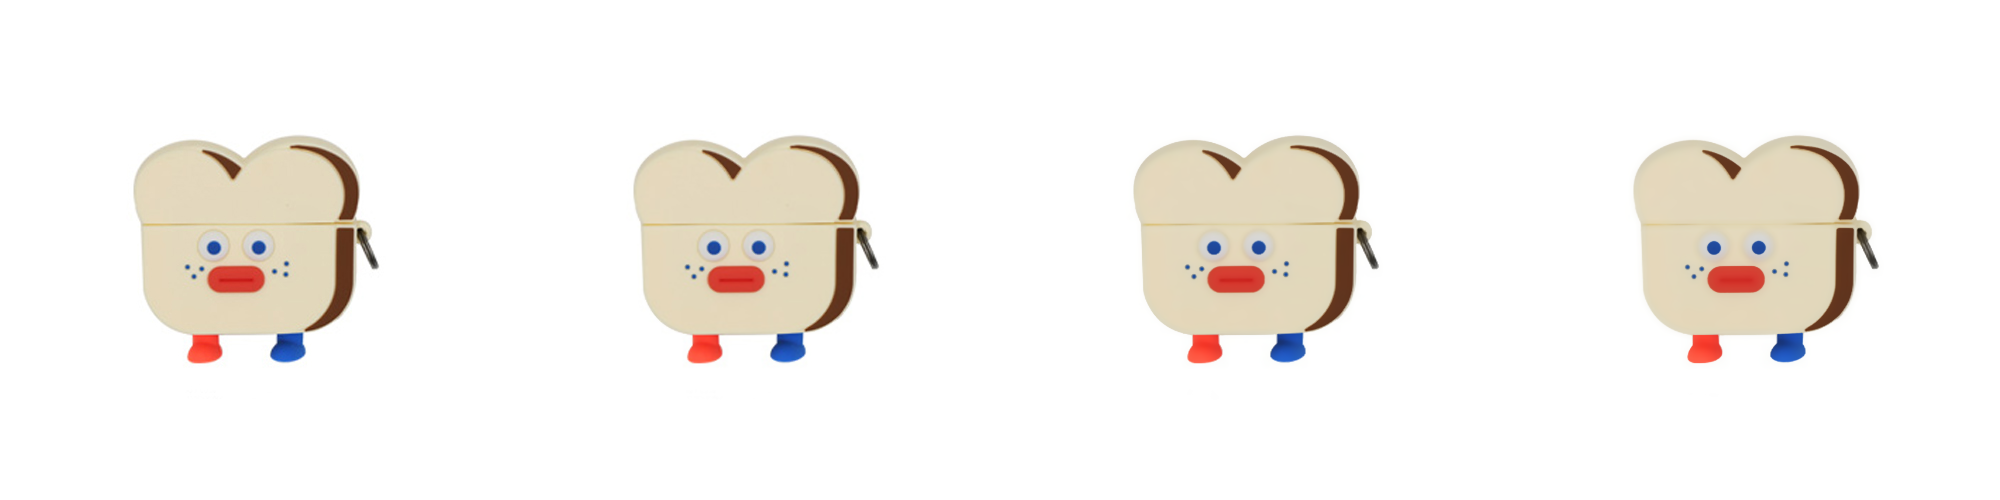

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

bilateralFiltered = np.hstack([
  image,                             
	cv2.bilateralFilter(image, 3, 21, 21),
	cv2.bilateralFilter(image, 9, 41, 41),
	cv2.bilateralFilter(image, 11, 61, 61)])

cv2_imshow(bilateralFiltered)

blurred images


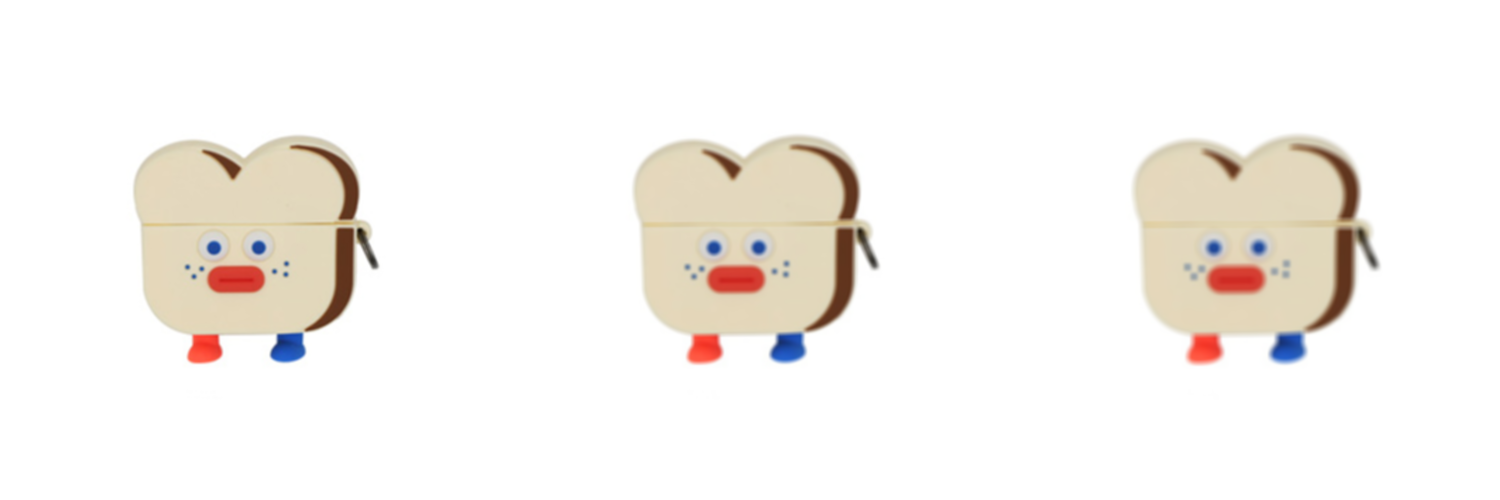

gaussian blurred images


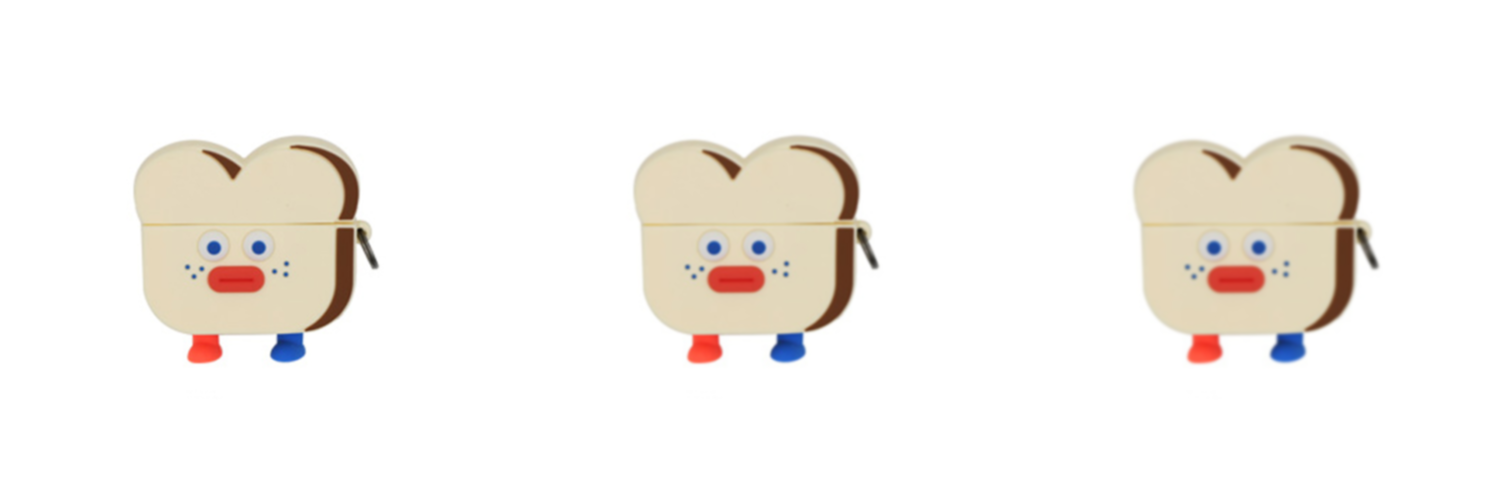

median blurred images


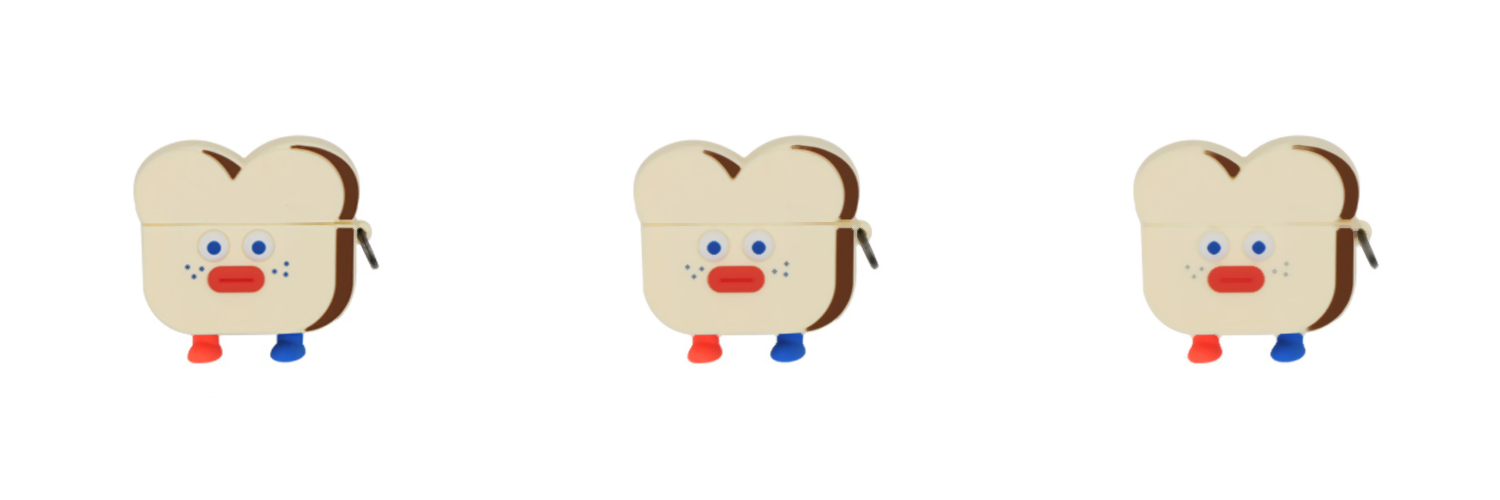

bilateral filtered images


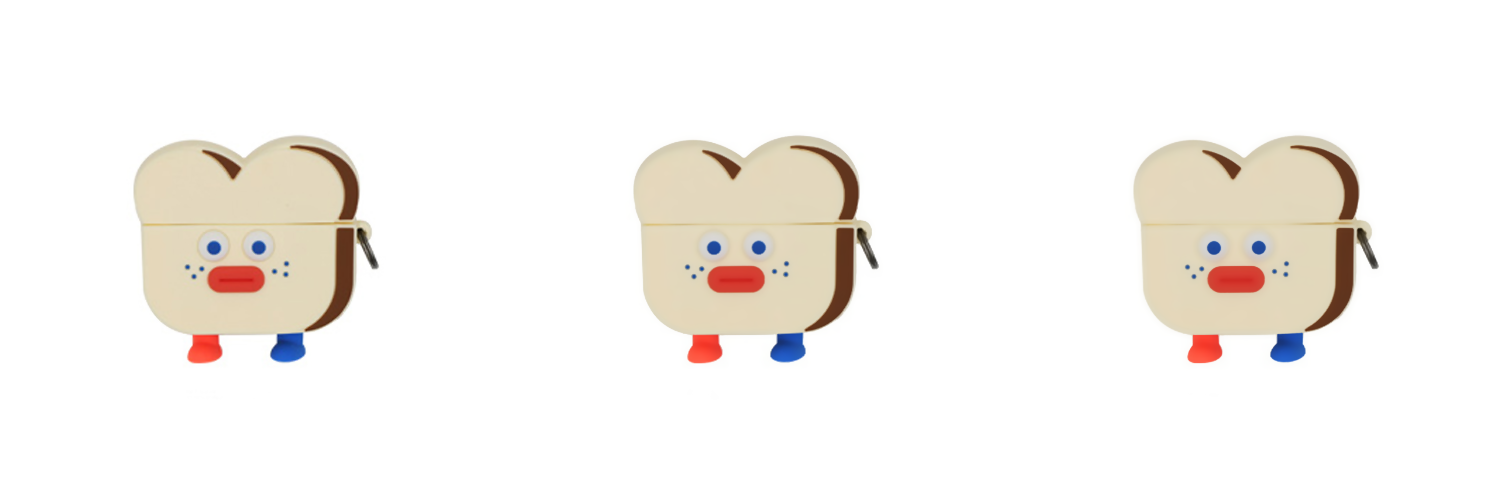

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper300x200.jpg')
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper_color150x150.jpg')

print("blurred images")
blurred = np.hstack([
	cv2.blur(image, (3, 3)),
	cv2.blur(image, (5, 5)),
	cv2.blur(image, (7, 7))])
cv2_imshow(blurred)

print("gaussian blurred images")
GaussianBlurred = np.hstack([
	cv2.GaussianBlur(image, (3, 3), 0),
	cv2.GaussianBlur(image, (5, 5), 0),
	cv2.GaussianBlur(image, (7, 7), 0)])
cv2_imshow(GaussianBlurred)

print("median blurred images")
medianBlurred = np.hstack([
	cv2.medianBlur(image, 3),
	cv2.medianBlur(image, 5),
	cv2.medianBlur(image, 7)])
cv2_imshow(medianBlurred)

print("bilateral filtered images")
bilateralFiltered = np.hstack([
	cv2.bilateralFilter(image, 3, 21, 21),
	cv2.bilateralFilter(image, 9, 41, 41),
	cv2.bilateralFilter(image, 11, 61, 61)])
cv2_imshow(bilateralFiltered)

##03 샤프닝 필터(Sharping Filter)


- 이미지의 경계를 더 선명하게 하는 효과
- 경계(edge/엣지) 검출하기 위해 픽셀 값의 변화가 갑자기 크게 일어나는 지점을 찾음
  - 연속된 픽셀 값에 미분 연산으로 구함
  - 이미지의 픽셀 데이터는 연속된 공간이 아니기 때문에 이산화 시켜서 근사 값으로 간소화 함
  
  ![image](https://docs.gimp.org/2.10/en/images/filters/edge-detect/gradient-calculation-fig.png)

  - fig.1 픽셀의 색의 명암(0-255)을 나타냄
    - 왼쪽의 경사가 완만한 구간은 테두리가 아님
    - 오른쪽의 경사가 가파른 곳이 경계 

  - fig.2 1차 미분(the first derivative): 픽셀의 명암이 바뀌는 속도
    - 임계점을 넘는 구간을 경계라고 지정할 수 있음
    - 실제 경계는 커브의 가장 상단 구간이지만 임계를 넘으면 경계로 지정하기 떄문에 다양한 경계선의 대부분이 두꺼워질 수 있음
    - 소벨 필터가 대표적

  - fig.3 2차 미분(the second derivative): 픽셀의 명암이 바뀌는 속도가 가장 빠른 구간을 0 
    - 1차 미분 커브의 가장 상단 부분들이 0으로 나타남
    - 2차 미분 경계가 한 픽셀로 표현되어 경계를 얇은 선들로 표시 가능
    - 대신 노이즈에 민감하기 때문에 경계가 아닌 부분도 경계로 표현될 수 있음
    - 라플라시안 필터(Laplacian edge detection)가 대표적 

  - 경계선을 도출하기 전에 블러 필터를 적용하면 더 좋은 결과가 나옴




**03.1 기본 미분 필터** 

- 컨볼루션 커널로 표현한 미분 연산 
- 각각 X축과 Y축 방향으로 근접 픽셀에서 현재 픽셀 값을 뺌

<br>
$$
\mathbf{G_x}
=
\begin{bmatrix} 
   - 1   &1 \\
\end{bmatrix}
$$
<br>
$$
\mathbf{G_y}
=
\begin{bmatrix} 
   - 1  \\ 
   1    \\
\end{bmatrix}
$$
<br>







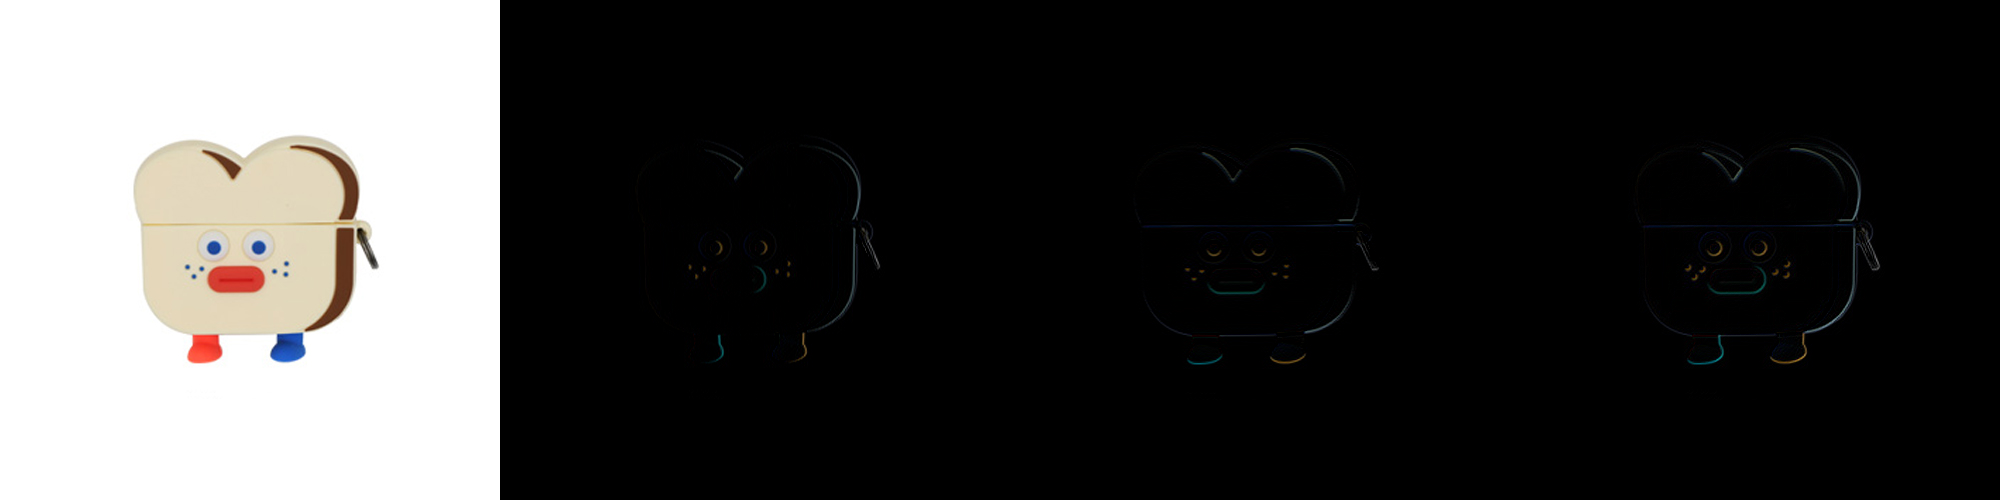

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

gx_kernel = np.array([[ -1, 1]])
gy_kernel = np.array([[ -1],
                      [ 1]])
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy ))
cv2_imshow(merged)


**03.2 로버츠 교차 필터** 

- 기본 미분 커널을 개선한 커널
- 대각선 뱡향으로 사선경계 검출 효과를 높임
- 노이즈에 미감하고 엣지 강도가 약함
- 실무에서 사용하지 않음

<br>
$$
\mathbf{G_x}
=
\begin{bmatrix} 
   1   &0\\
   0   &-1\\
\end{bmatrix}
$$
<br>
$$
\mathbf{G_y}
=
\begin{bmatrix} 
   0  &1  \\ 
   -1  &0  \\
\end{bmatrix}
$$
<br>







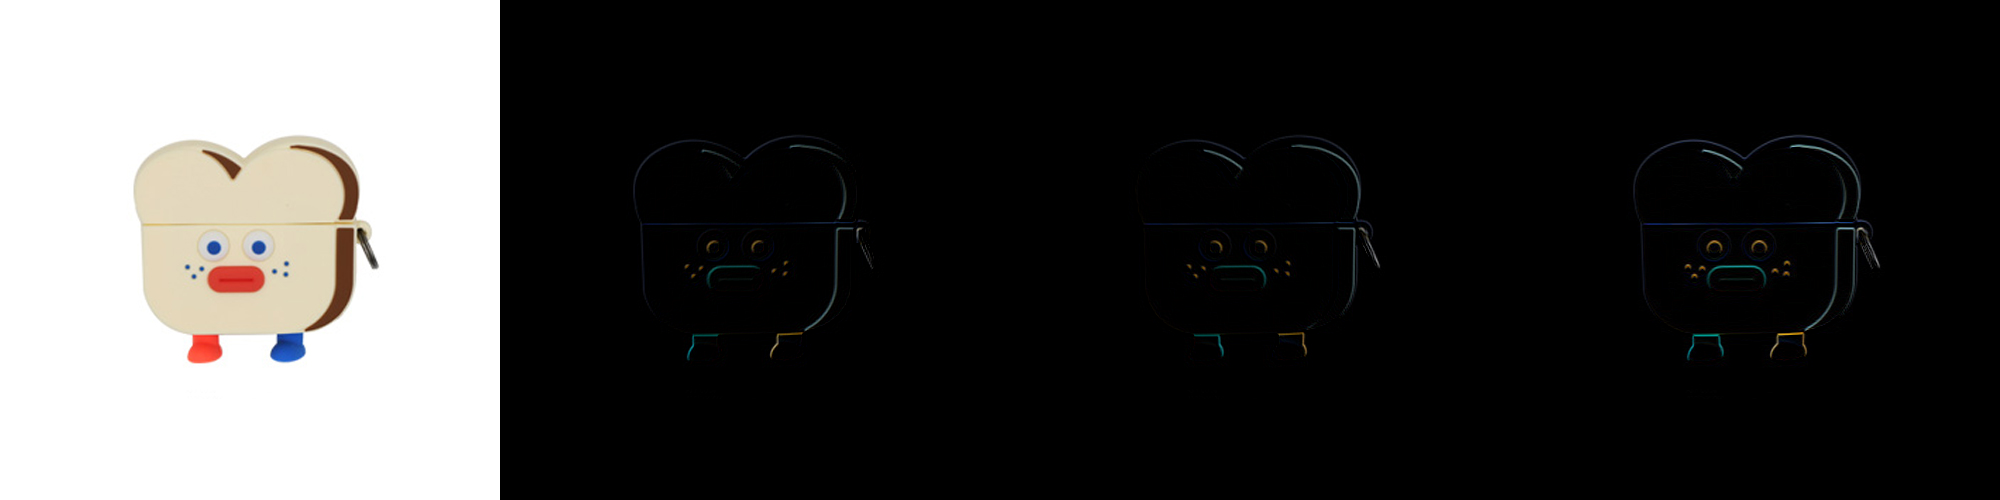

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

gx_kernel = np.array([[1,0], 
                      [0,-1]])
gy_kernel = np.array([[0, 1],
                      [-1,0]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
cv2_imshow(merged)


**03.3 프리윗 필터** 

- 각 뱡향으로 차분을 세 번 계산 하도록 배치
- 엣지 강도가 강하고 수직과 수평 엣지를 동등하게 찾음
- 대각선 검출에는 약함
- 실무에서 사용하지 않음

<br>
$$
\mathbf{G_x}
=
\begin{bmatrix} 
  -1   &0   &1\\
  -1   &0   &1\\
  -1   &0   &1\\
\end{bmatrix}
$$
<br>
$$
\mathbf{G_y}
=
\begin{bmatrix} 
  -1   &-1   &-1\\
  0   &0   &0\\
  1   &1   &1\\
\end{bmatrix}
$$
<br>







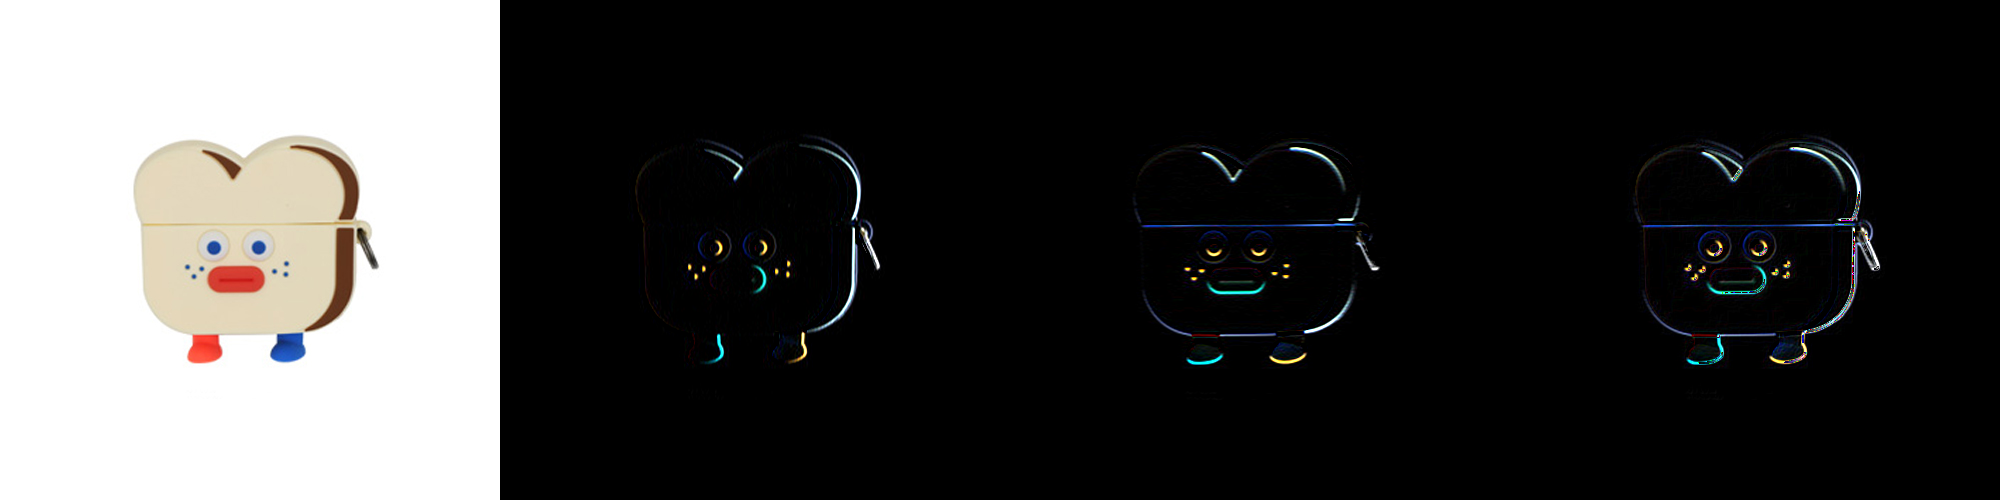

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')
# img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/unne_pen.jpg')


gx_k = np.array([[-1,0,1], 
                 [-1,0,1],
                 [-1,0,1]])

gy_k = np.array([[-1,-1,-1],
                 [0,0,0], 
                 [1,1,1]])

edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
cv2_imshow(merged)


**03.4 소벨 필터** 

- 중심 픽셀의 차분 비중을 두 배로 주고 수평, 수직, 대각선 경계 검출에 모두 강한 마스크 제안
- 대표적인 1차 미분 마스크
- 커널의 크기가 작은 경우 혹은 크더라도 중심에서 멀어질 수록 엣지 방향성의 정확도가 떨어짐

<br>
$$
\mathbf{G_x}
=
\begin{bmatrix} 
  -1   &0   &1\\
  -2   &0   &2\\
  -1   &0   &1\\
\end{bmatrix}
$$
<br>
$$
\mathbf{G_y}
=
\begin{bmatrix} 
  -1   &-2   &-1\\
  0   &0   &0\\
  1   &2   &1\\
\end{bmatrix}
$$
<br>







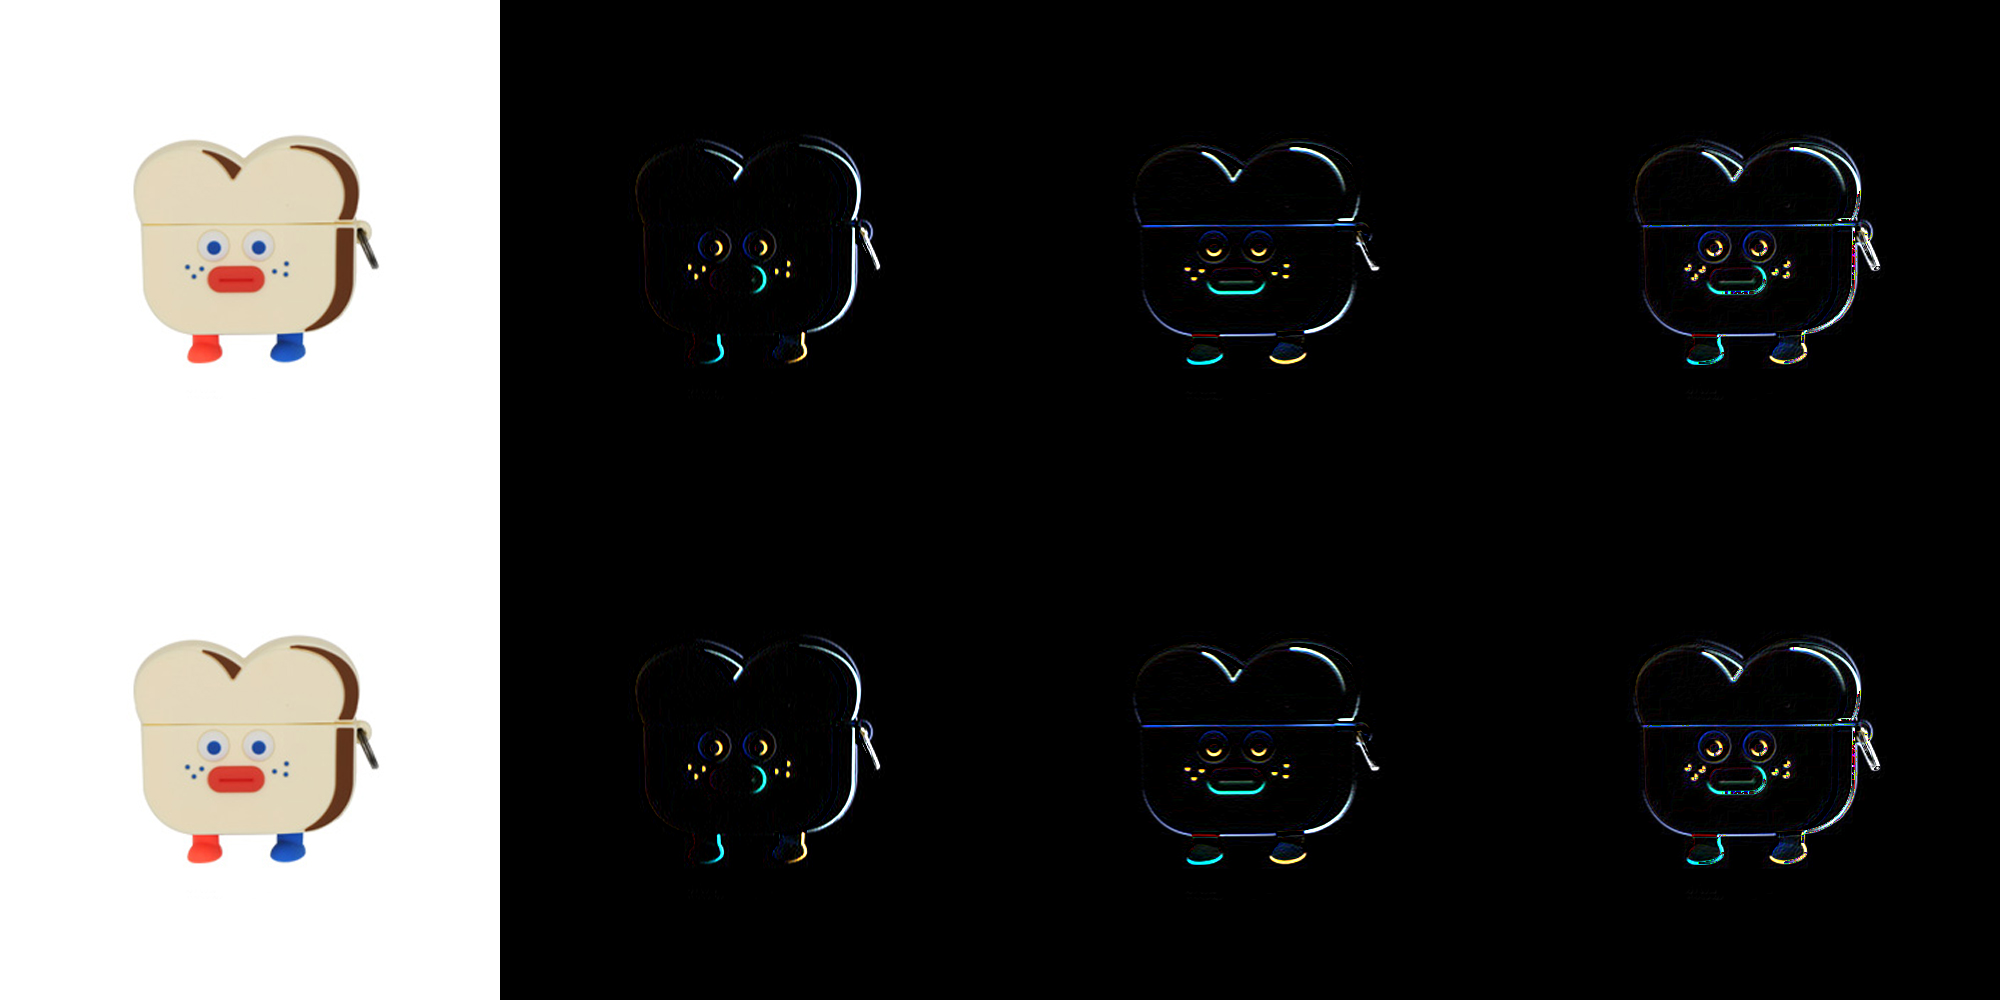

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

gx_k = np.array([[-1,0,1], 
                 [-2,0,2],
                 [-1,0,1]])

gy_k = np.array([[-1,-2,-1],
                 [0,0,0], 
                 [1,2,1]])

edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 소벨 openCV API
# cv2.Sobel(입력 이미지, 출력 영상의 dtype, dx,dy의 미분 차수(0,1,2) 둘 다 0은 안됨, ksize는 (1,3,5,7 중 선택) )
sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3) 

merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
cv2_imshow(merged)


**03.5 샤르 필터** 

- 소벨필터의 정확도를 개선한 필터

<br>
$$
\mathbf{G_x}
=
\begin{bmatrix} 
  -3   &0   &3\\
  -10  &0   &10\\
  -3   &0   &3\\
\end{bmatrix}
$$
<br>
$$
\mathbf{G_y}
=
\begin{bmatrix} 
  -3   &-10   &-3\\
  0   &0   &0\\
  3   &10   &3\\
\end{bmatrix}
$$
<br>







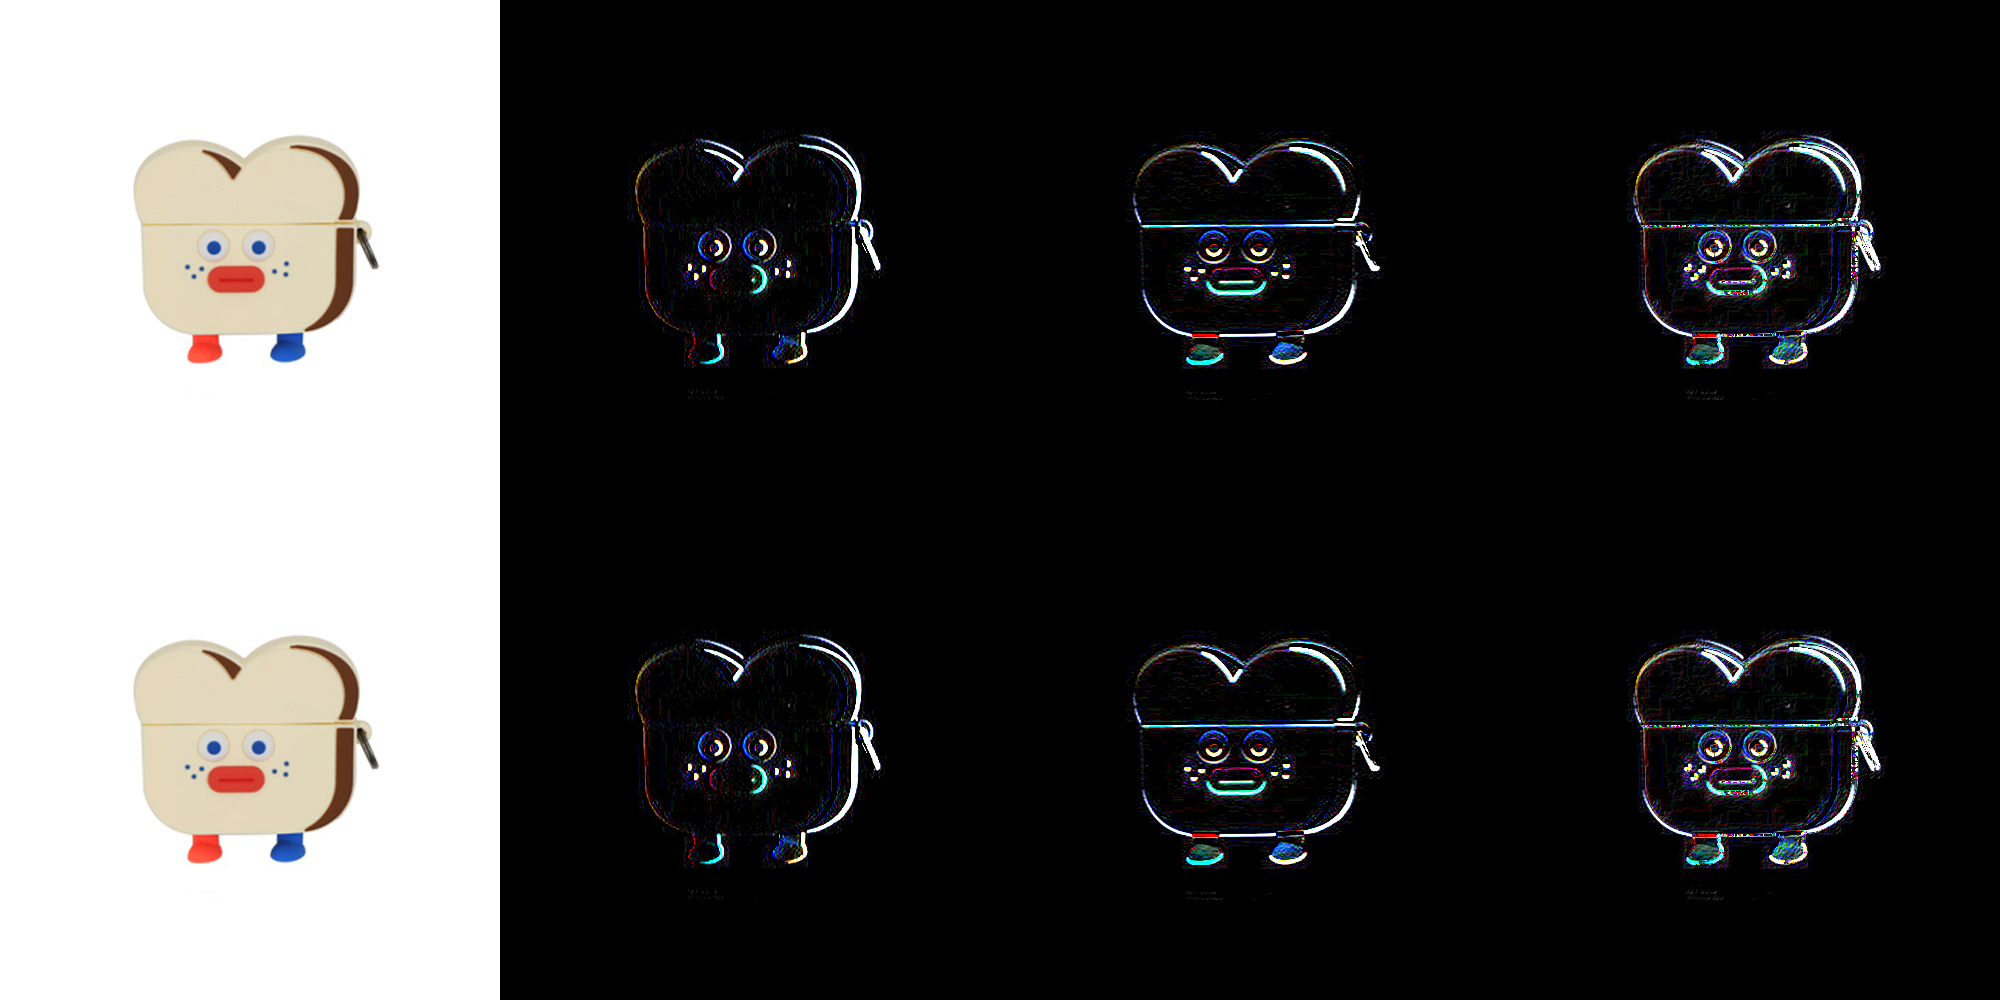

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 


img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

gx_k = np.array([[-3,0,3],
                 [-10,0,10],
                 [-3,0,3]])

gy_k = np.array([[-3,-10,-3],
                 [0,0,0],
                 [3,10,3]])

edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 샤르 API
scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)


merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, scharrx, scharry, scharrx+scharry))
merged = np.vstack((merged1, merged2))
cv2_imshow(merged)


**03.6 라플라시안 필터** 

- 대표적인 2차 미분필터 
- 2차 미분을 하면 더 정확한 경계 검출이 가능
- 라플라시안 필터는 노이즈에 민감해서 가우시안 필터로 노이즈를 제거하고 사용하면 좋음

<br>
$$
\mathbf{Kernel}
=
\begin{bmatrix} 
  0   &1   &0\\
  1   &-4  &1\\
  0   &1   &0\\
\end{bmatrix}
$$
<br>







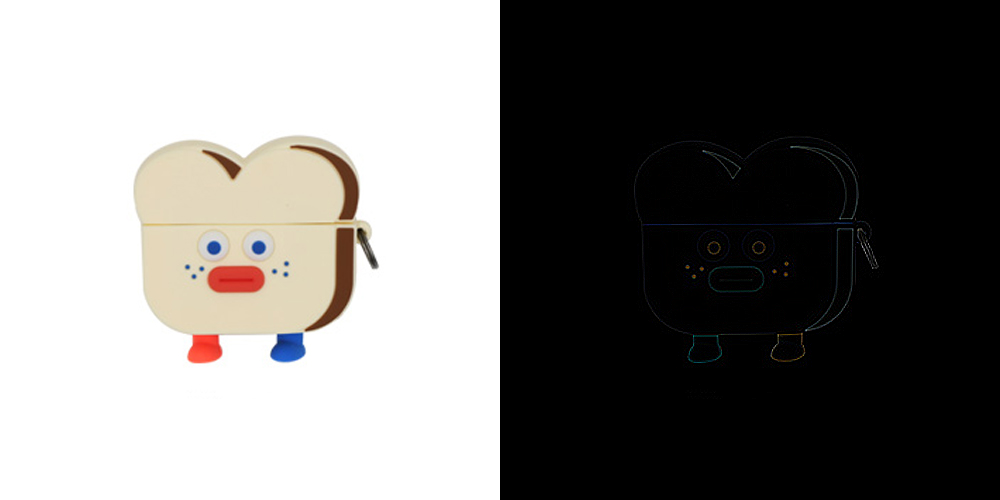

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

edge = cv2.Laplacian(img, -1)

# 결과 출력
merged = np.hstack((img, edge))
cv2_imshow(merged)


**03.7 케니 엣지 검출 필터** 


- 경계 검출 결과가 뛰어나 가장 많이 쓰이는 함수
- 한 가지 필터를 사용하는 것이 아니라 4단계 알고리즘을 적용해 노이즈에 강한 엣지 검출기

  1. **노이즈 제거(Noise Resuction)**: 5 x 5 가우시안 블러링 필터로 노이즈 제거

  2. **경계 그레디언트 방향 계산**: 소벨 필터로 경계 및 그레디언트 방향 검출

  3. **비최대치 억제(Non-Maximum Suppression)**: 그레디언트 방향에서 검출된 경계 중 가장 큰 값만 선택하고 나머지는 제거

  4. **이력 스레시홀딩(Hysteresis Thresholding)**: 두 개의 경계 값(Max, Min)을 지정해서 경계 영역에 있는 픽셀들 중 큰 경계 값(Max) 밖의 픽셀과 연결성이 없는 픽셀 제거

- 스레시홀드 값의 지정에 따라 경계 검출 대상을 조정할 수 있음

![image](https://cdn-5f733ed3c1ac190fbc56ef88.closte.com/wp-content/uploads/2019/02/hysteresis-thresholding.jpg)






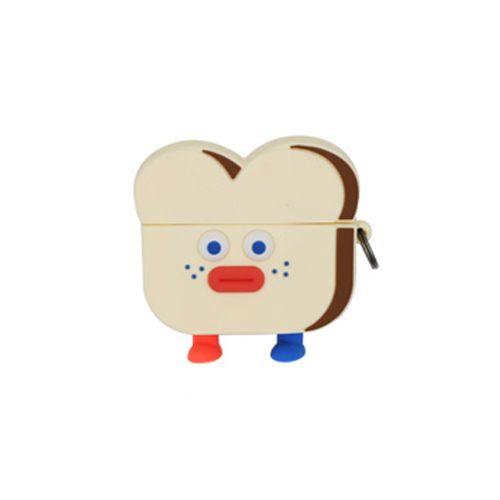

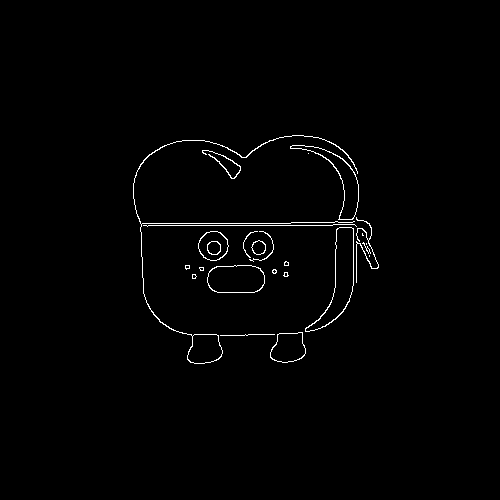

In [31]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg')

#cv2.Canny(이미지, 스레시홀드 최소/최대 값)
edges = cv2.Canny(img,100,200)

cv2_imshow(img)
cv2_imshow(edges)


##04 모폴로지(morphology)

모폴로지(morphology)는 '형태학'을 뜻함
- 이미지의 노이즈 제거, 구멍 채우기, 끊어진 선 이어 붙이기 등에 쓰이는 형태학적 연산
- 모폴로지 연산은 보통 검은색과 흰색으로만 구성되어 있는 바이너리(binary)이미지나 그레이스케일 이미지에 적용
- 모폴로지 4가지 연산: 침식, 팽창, 열림, 닫힘

참고자료 
[모폴로지](https://blog.daum.net/shksjy/314)

**04.1 침식(erosion) 연산**

- 이미지의 형태를 깎아 내는 연산
- 구조화 요소 커널(structuring element kernel): 0과 1로 구성된 커널
  - 1이 채워진 모양에 따라 사각형, 타원형, 십자형 등으로 사용 가능
  - 구조화 요소 커널이 이미지의 형태 위에 완전히 포함되지 않는 부분을 0으로 변경
- 어두운 부분의 노이즈를 제거하는 효과
- 원본보다 얇게 변형되는 효과 


![](https://t1.daumcdn.net/cfile/blog/255DD543529C8E4C20)





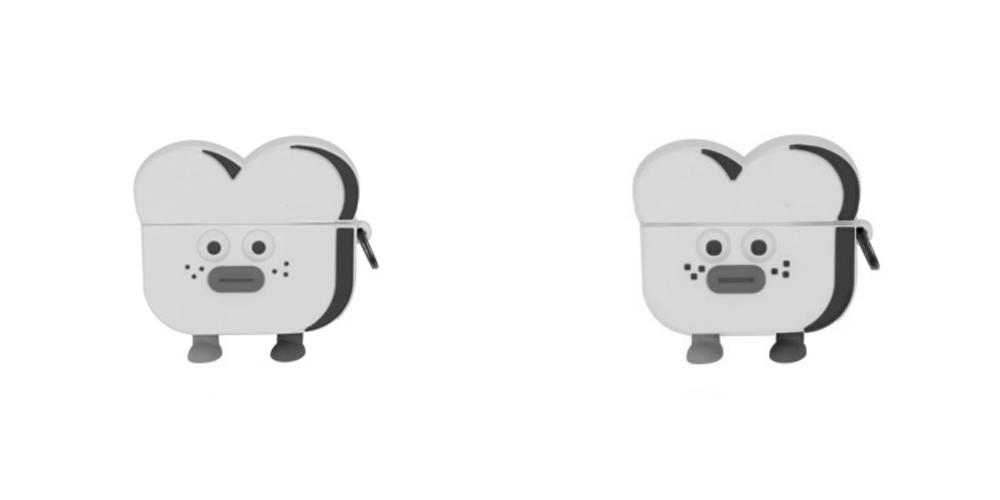

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널과 사각형 (3x3) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

erosion = cv2.erode(img, k)

merged = np.hstack((img, erosion))
cv2_imshow(merged)


**04.2 팽창(dilatation) 연산**

- 이미지의 형태 주변을 확장하는 연산
- 구조화 요소 커널이 이미지의 형태 위에 완전히 포함되지 않는 부분을 1로 변경

- 밝은 부분의 노이즈를 제거하는 효과
- 원본보다 두꺼워지는 변형이 생김


![](https://t1.daumcdn.net/cfile/blog/212D223E529C93D407)



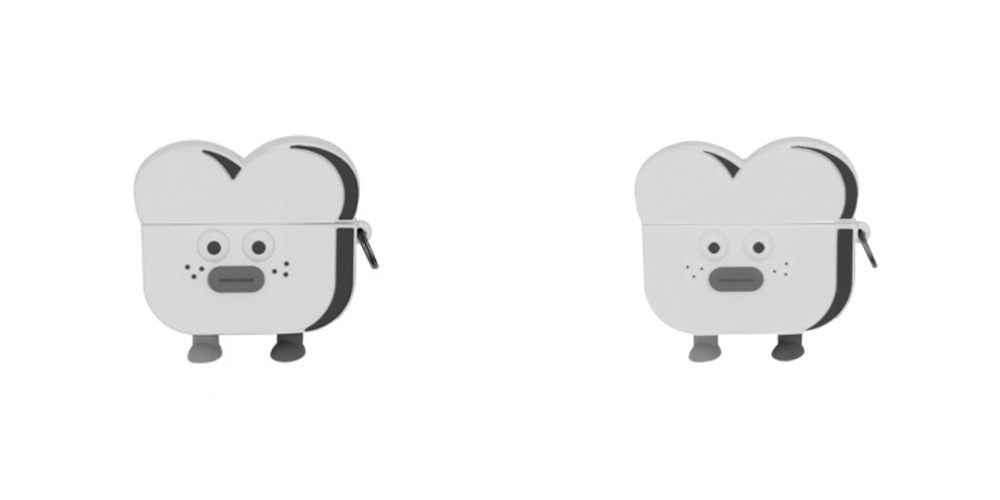

In [33]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널과 사각형 (3x3) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst = cv2.dilate(img, k)

merged = np.hstack((img, dst))
cv2_imshow(merged)

**04.3 열림(opening)연산**

**열림 = 침식 + 팽창**

- 침식 연산 후 팽창 연산을 적용
- 주변보다 밝은 노이즈를 제거하는데 효과적
- 맞닿아 있는 독립된 개체를 분리하거나 돌출된 모양을 제거하는 데 효과적




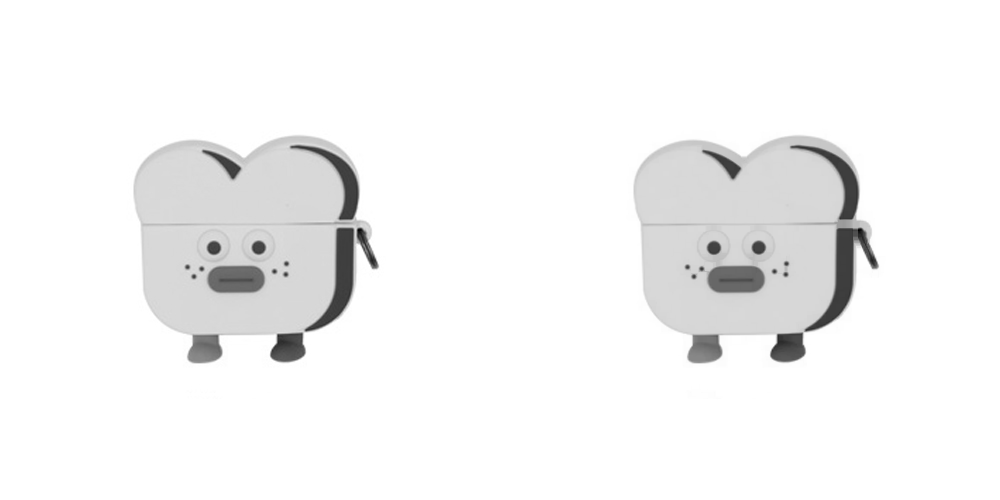

In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널, 사각형 (5x5) 생성 
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)

merged = np.hstack((img, opening))
cv2_imshow(merged)

**04.3 닫힘(closing) 연산**

**닫힘 = 팽창 + 침식**

- 팽창 연산 후 침식 연산을 적용
- 닫힘 연산은 주변보다 어두운 노이즈를 제거하는데 효과적
- 끊어져 보이는 개체를 연결하거나 구멍을 메우는 데 효과적 


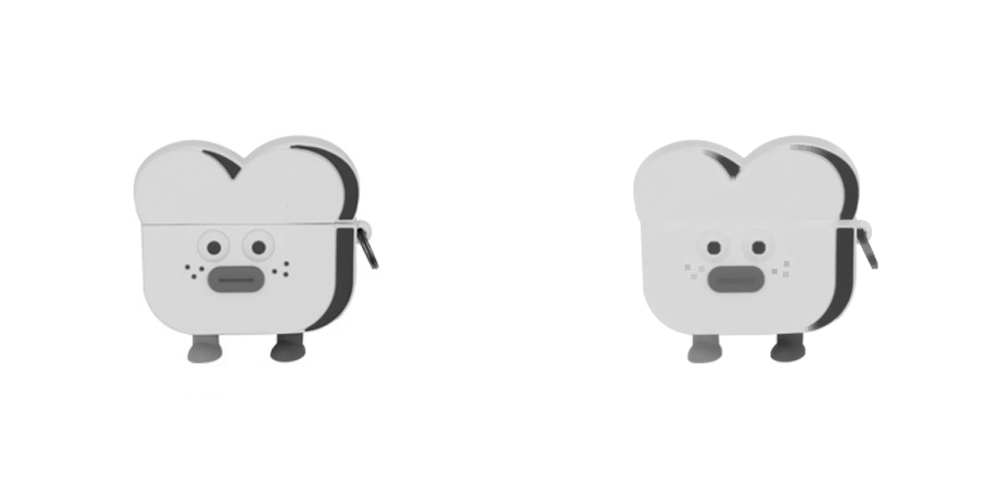

In [35]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/AI활용영상데이터처리/photos/brunchBrotherAirpodCase.jpg', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널, 사각형 (5x5) 생성 
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, k)

merged = np.hstack((img, closing))
cv2_imshow(merged)

